In [44]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow import keras
from keras.models import Sequential
import os

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

tf.config.list_physical_devices('GPU')

[]

In [2]:
data = tf.keras.utils.image_dataset_from_directory('data')
data = data.map(lambda x, y: (x / 255, tf.one_hot(y, 26)))
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 7779 files belonging to 26 classes.


2023-05-18 01:17:54.901609: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7779]
	 [[{{node Placeholder/_4}}]]
2023-05-18 01:17:54.901809: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [7779]
	 [[{{node Placeholder/_0}}]]


In [4]:
#scaling data
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

2023-05-18 01:17:58.966404: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7779]
	 [[{{node Placeholder/_4}}]]
2023-05-18 01:17:58.966611: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7779]
	 [[{{node Placeholder/_4}}]]


(array([[[[0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157]],
 
         [[0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157]],
 
         [[0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157]],
 
         ...,
 
         [[0.00392157, 0.00392157, 0.00392157],
          [0.00392

In [5]:
train_size = int(len(data)*.7) #170
val_size = int(len(data)*.2)+1 #48
test_size = int(len(data)*.1)+1 #24

In [6]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [7]:
#deep CNN 
model = Sequential()
model.add(keras.layers.Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Conv2D(32, (3,3), 1, activation='relu'))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Conv2D(16, (3,3), 1, activation='relu'))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(26, activation='softmax'))
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])


In [9]:
#training
logdir='logs'

In [10]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [11]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-05-18 01:18:09.404575: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7779]
	 [[{{node Placeholder/_4}}]]
2023-05-18 01:18:09.404822: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7779]
	 [[{{node Placeholder/_4}}]]


170/170 [==============================] - ETA: 0s - loss: 3.2092 - accuracy: 0.0511

2023-05-18 01:18:39.583547: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7779]
	 [[{{node Placeholder/_4}}]]
2023-05-18 01:18:39.583763: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7779]
	 [[{{node Placeholder/_4}}]]


170/170 [==============================] - 33s 192ms/step - loss: 3.2092 - accuracy: 0.0511 - val_loss: 2.9112 - val_accuracy: 0.1154
Epoch 2/20
170/170 [==============================] - 33s 194ms/step - loss: 1.9448 - accuracy: 0.4074 - val_loss: 1.3525 - val_accuracy: 0.6122
Epoch 3/20
170/170 [==============================] - 33s 193ms/step - loss: 0.9883 - accuracy: 0.7182 - val_loss: 0.7750 - val_accuracy: 0.7991
Epoch 4/20
170/170 [==============================] - 32s 187ms/step - loss: 0.6829 - accuracy: 0.8074 - val_loss: 0.6848 - val_accuracy: 0.8125
Epoch 5/20
170/170 [==============================] - 32s 188ms/step - loss: 0.5284 - accuracy: 0.8454 - val_loss: 0.6663 - val_accuracy: 0.8176
Epoch 6/20
170/170 [==============================] - 32s 190ms/step - loss: 0.4426 - accuracy: 0.8728 - val_loss: 0.5335 - val_accuracy: 0.8629
Epoch 7/20
170/170 [==============================] - 32s 185ms/step - loss: 0.3545 - accuracy: 0.8989 - val_loss: 0.4027 - val_accuracy: 0.8

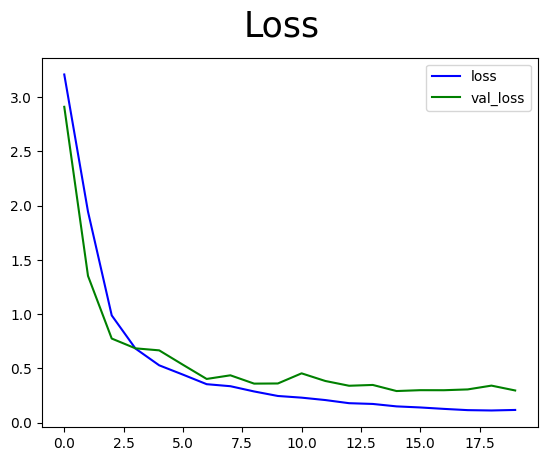

In [20]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss') #training
plt.plot(hist.history['val_loss'], color='green', label='val_loss') #validation
fig.suptitle('Loss', fontsize=25)
plt.legend(loc="upper right")
plt.show()

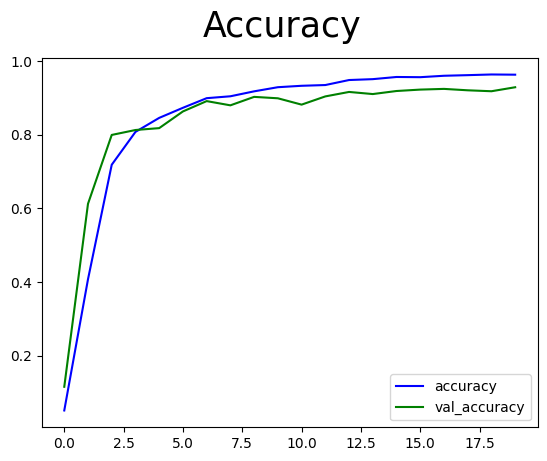

In [19]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='green', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=25)
plt.legend(loc="lower right")
plt.show()

In [45]:
model.save(os.path.join('models','imageclassifier.h5'))

/Users/morgansuh/Library/Python/3.8/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
